# Fake news detection

**Authors:** Peter Mačinec, Simona Miková

## Descriptive analysis of dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 15})

In [3]:
df = pd.read_json('../data/raw/dataset.json', orient='index')

In [4]:
len(df)

195764

In [5]:
df.head()

author  \
235036                                         Mike Adams   
235037  by Ronica O&rsquo;Hara (info@www.naturalawaken...   
235038  by Kathleen Gould and Madalyn Johnson (info@ww...   
235039                                         Mike Adams   
235040  by Andrea Purcell (info@www.naturalawakeningsm...   

                                                     body      id  \
235036  (NaturalNews) The United States government cla...  235036   
235037  DIGITAL KIDS: How to Click With Young Techies\...  235037   
235038  Herbs: Nature’s Fountain of Youth\n\nby Kathle...  235038   
235039  (NaturalNews) Beyond merely inspiring women to...  235039   
235040  Give Your Brain a Boost\n\nby Andrea Purcell\n...  235040   

                                                    image       label  \
235036  https://www.naturalnewsblogs.com/wp-content/up...  unreliable   
235037  http://www.naturalawakeningsmag.com/Healthy-Ki...  unreliable   
235038  http://www.naturalaz.com/ARIZ/September-2019/H...  unreliable   
235039  https://www.naturalnewsblogs.com/wp-content/up...  unreliable   
235040  http://www.naturalaz.com/ARIZ/September-2019/G...  unreliable   

                                                    perex  \
235036  <p>(NaturalNews) The United States government ...   
235037  Many Silicon Valley executives that design dev...   
235038  It seems aging is a two-edge sword. At the sam...   
235039  <p>(NaturalNews) Beyond merely inspiring women...   
235040  In the United States, there are currently 9.4 ...   

                          source  \
235036      naturalnewsblogs.com   
235037  naturalawakeningsmag.com   
235038  naturalawakeningsmag.com   
235039      naturalnewsblogs.com   
235040  naturalawakeningsmag.com   

                                                    title  
235036  US government claims 100% ownership over all y...  
235037      DIGITAL KIDS: How to Click With Young Techies  
235038                  Herbs: Nature’s Fountain of Youth  
235039  Angelina Jolie copied by men! Surgeons now cut...  
235040                            Give Your Brain a Boost

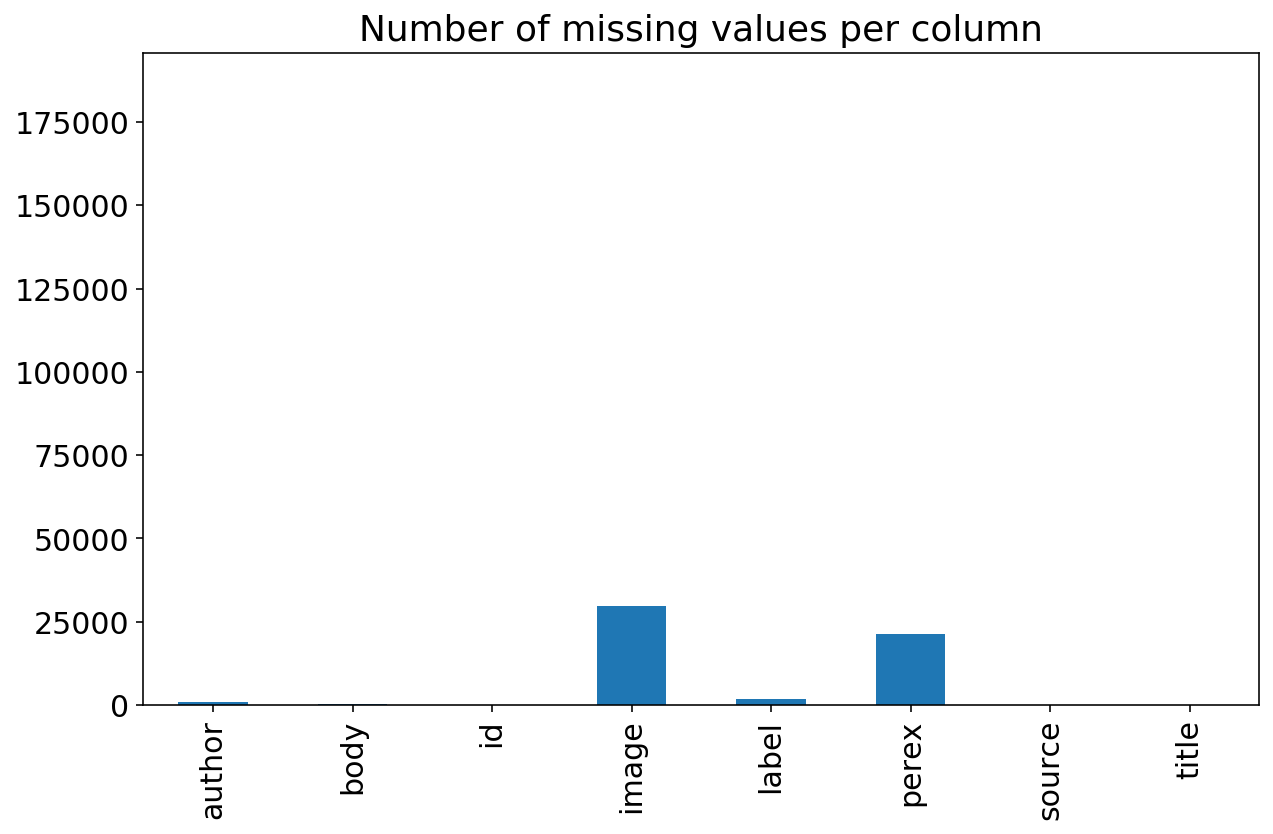

In [7]:
df.isnull().sum().plot(
    kind='bar',
    title='Number of missing values per column',
    ylim=(0, len(df))
);

In [8]:
df.describe(exclude=[np.number])

author  \
count                                              194880   
unique                                               5195   
top     Neuroscience News Posts Science Research News ...   
freq                                                12941   

                                                     body  \
count                                              195560   
unique                                             182501   
top     \nbody.page-template-default .section-title { ...   
freq                                                  953   

                                                    image       label  \
count                                              165907      193951   
unique                                             134343           2   
top     https://www.statnews.com/wp-content/uploads/20...  unreliable   
freq                                                  950      156341   

                                                    perex           source  \
count                                              174427           195764   
unique                                             159132              119   
top     <p>Log In Enter your username and password bel...  naturalnews.com   
freq                                                  605            20452   

                                                    title  
count                                              195764  
unique                                             178276  
top     Up and down the ladder: The latest comings and...  
freq                                                  136

In [9]:
df.source.value_counts()[:10]

naturalnews.com         20452
naturalnewsblogs.com    17755
neurosciencenews.com    13050
statnews.com            12109
hsionline.com            8147
naturalsociety.com       7348
healthnutnews.com        7149
healthimpactnews.com     6232
infowars.com             6009
zemavek.sk               5337
Name: source, dtype: int64

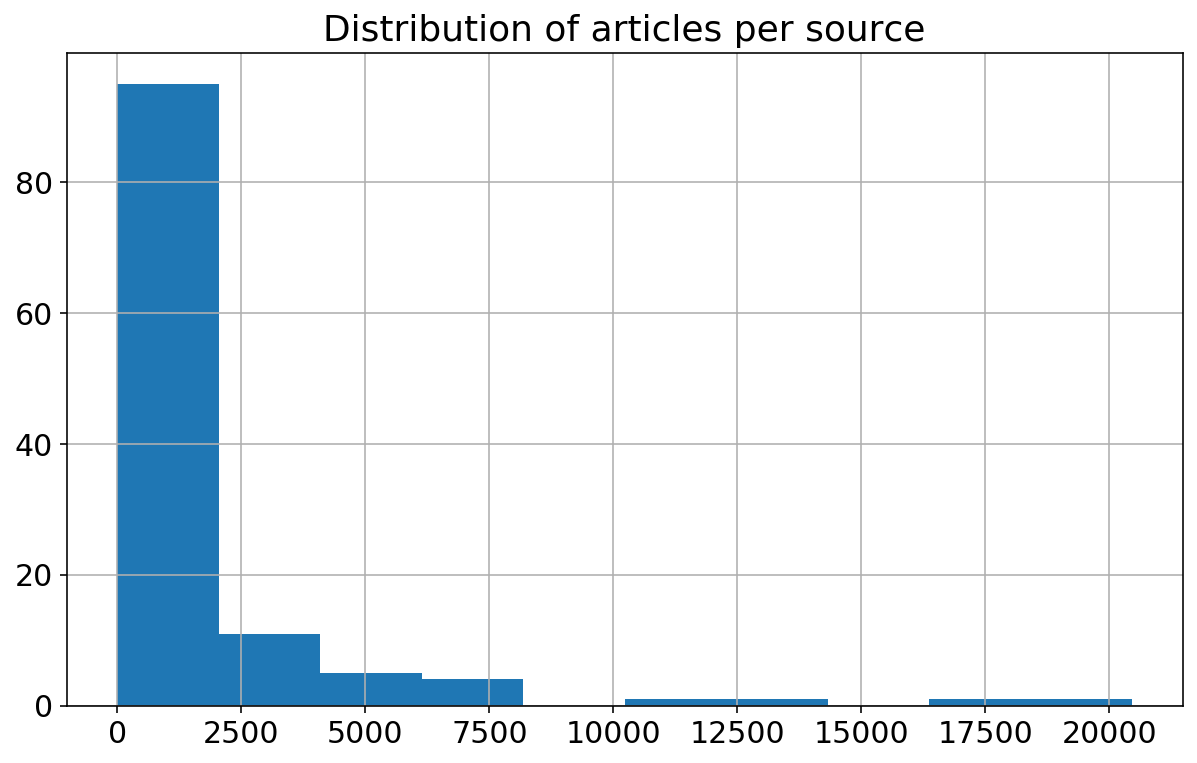

In [10]:
df.source.value_counts().hist();
plt.title('Distribution of articles per source');

In [11]:
df.label.value_counts()

unreliable    156341
reliable       37610
Name: label, dtype: int64

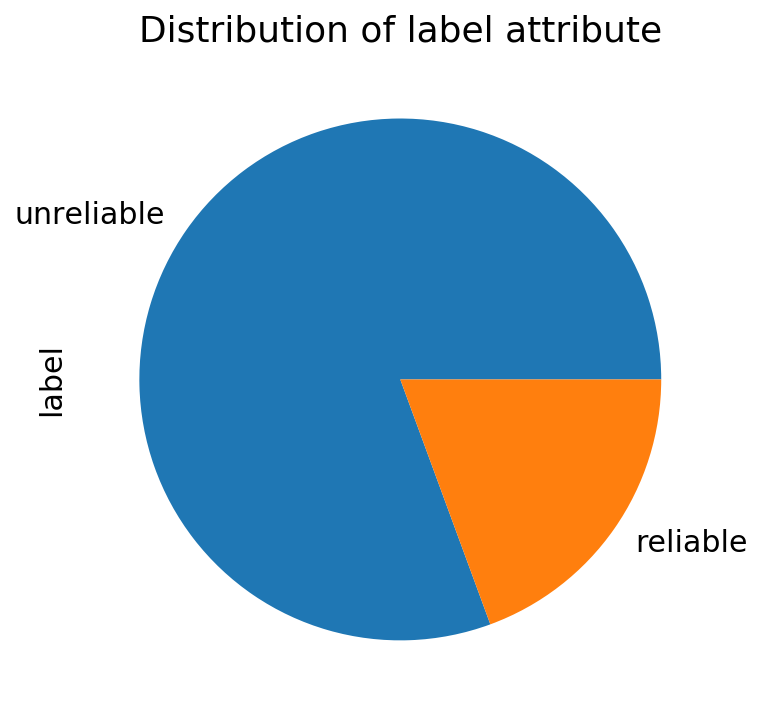

In [12]:
df.label.value_counts().plot(kind='pie', title='Distribution of label attribute');

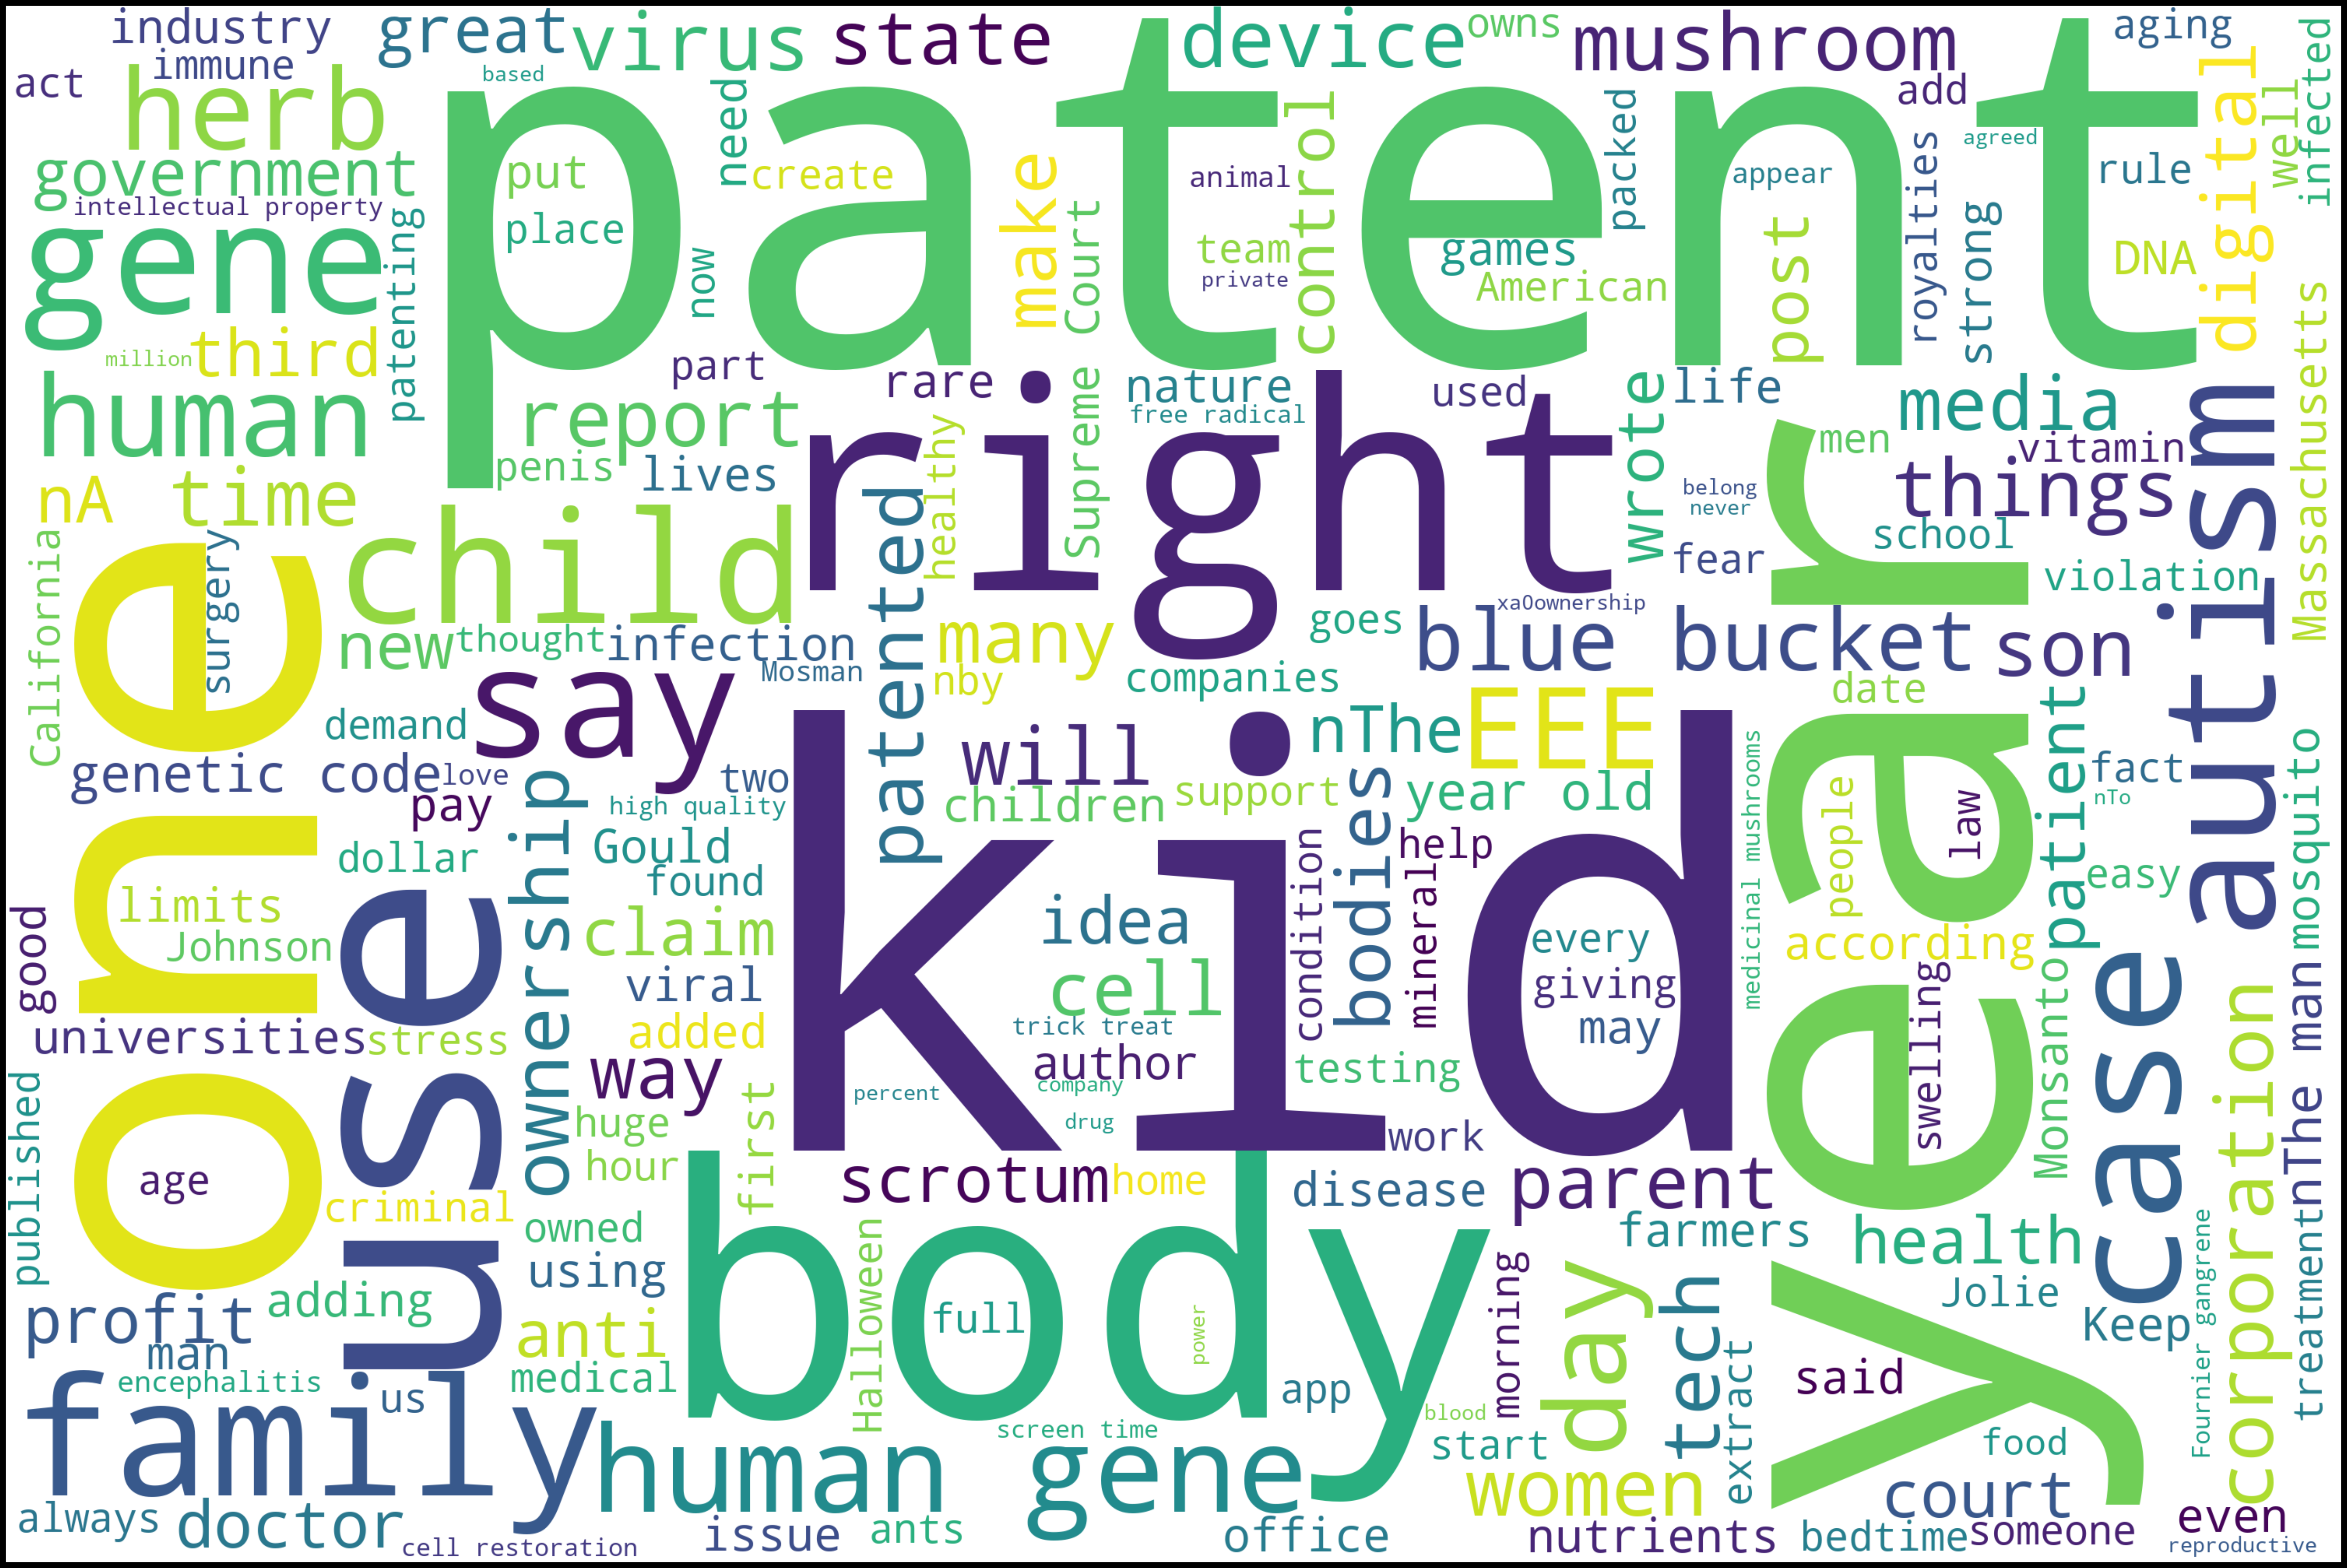

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = df.body.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file("wordcloud.png")

In [14]:
import langdetect
MIN_TEXT_LENGTH_FOR_DETECTION = 20
def detect_language(text):
    if not text or len(text) < MIN_TEXT_LENGTH_FOR_DETECTION:
        return None
    try:
        return langdetect.detect(text)
    except langdetect.lang_detect_exception.LangDetectException as e:
        print(e)
        print(text)
        return None 

In [15]:
for index, row in df.iterrows():
    df.at[index,'language'] = detect_language(df.at[index, 'body'])

No features in text.
http://medicalxpress.com/news/2013-08-vaccination-flu-worse-exposed-strain.html

No features in text.




 







     






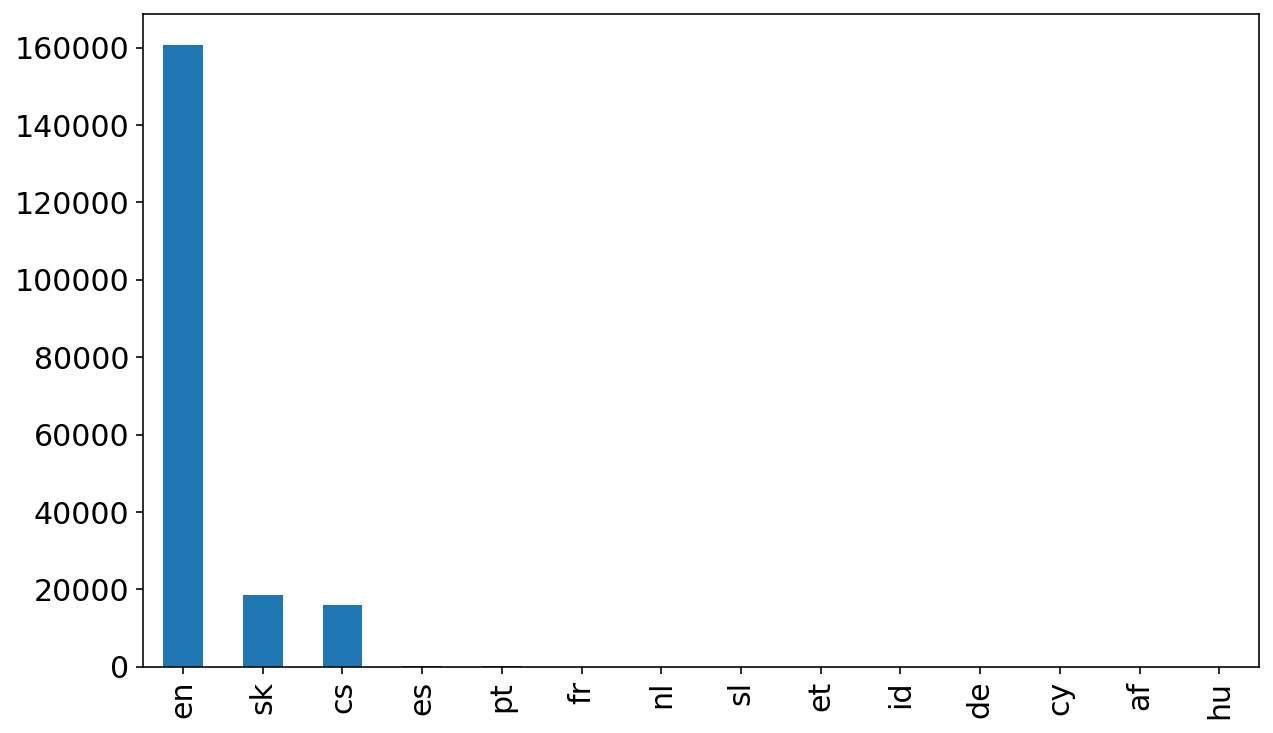

In [16]:
pd.value_counts(df['language']).plot.bar()

In [20]:
df['word_count'] = df['body'].apply(lambda x: len(str(x).split(" ")))
df[['body','word_count']].head()

body  word_count
235036  (NaturalNews) The United States government cla...         942
235037  DIGITAL KIDS: How to Click With Young Techies\...         704
235038  Herbs: Nature’s Fountain of Youth\n\nby Kathle...         746
235039  (NaturalNews) Beyond merely inspiring women to...        1217
235040  Give Your Brain a Boost\n\nby Andrea Purcell\n...         492

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222FFB9E0B8>]],
      dtype=object)

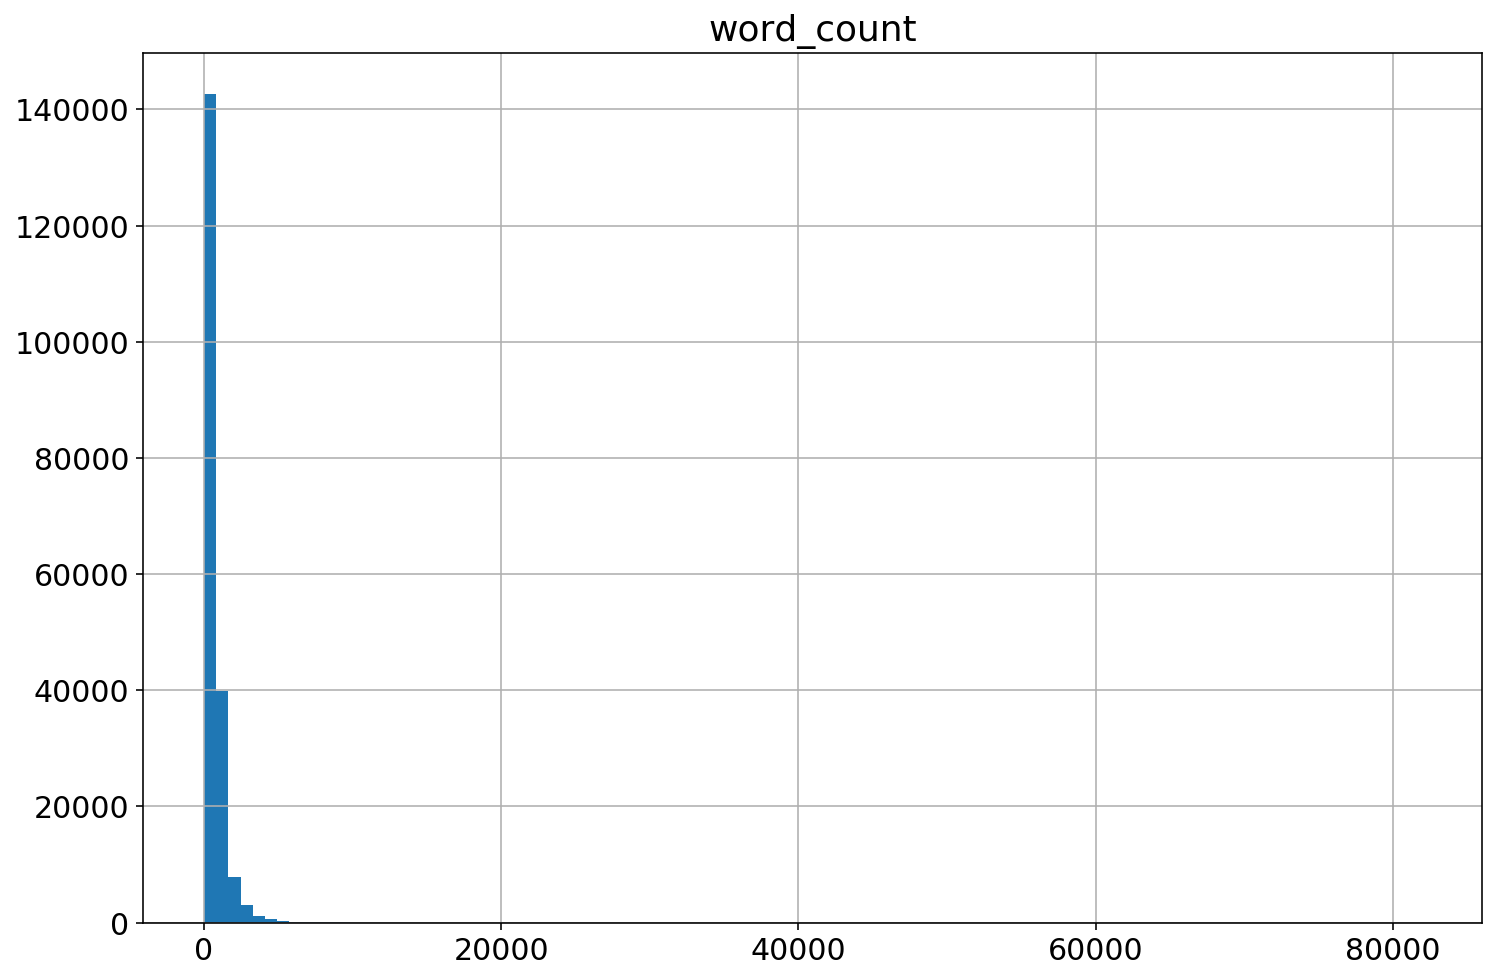

In [55]:
df.hist(column='word_count', bins=100, figsize=(12,8))

In [34]:
df.nlargest(5, ['word_count']) 

author                                               body  \
394340     Zdravi4u.cz  \n\n\n\n\n\n\n3  OHŘÍVAČE\n\nSRPEN – VLÁDNOU  ...   
326834              VT  Full Article Here.  (UPDATE — PATENT AFTER PRE...   
323994       Lee Kenny  For the first time, you can get to read the ex...   
285747  Erin Elizabeth  Bayer funded Adolph Hitler reign and was the b...   
258505           Admin  \nBetrayal of Public Trust & Institutional Cor...   

            id                                              image       label  \
394340  394340                                               None  unreliable   
326834  326834                                               None  unreliable   
323994  323994  https://www.naturalcures.com/wp-content/upload...  unreliable   
285747  285747  https://www.healthnutnews.com/wp-content/uploa...  unreliable   
258505  258505  https://healthimpactnews.com/wp-content/upload...  unreliable   

                                                    perex  \
394340  <p>3 OHŘÍVAČE SRPEN – VLÁDNOU NÁM 3 OHŘÍVAČE 3...   
326834  <p>VeriChip Corp shares tripled after the comp...   
323994  <p>Pounds and Inches Full transcript from HCG ...   
285747  <p>Bayer funded Adolph Hitler reign and was th...   
258505  <p>The focus of this article is how the Center...   

                      source  \
394340           zdravi4u.cz   
326834          vactruth.com   
323994      naturalcures.com   
285747     healthnutnews.com   
258505  healthimpactnews.com   

                                                    title language  word_count  
394340                                       Mapa stránek       en       81928  
326834  VeriChip shares jump after H1N1 patent license...       en       51157  
323994           Dr Simeons Pounds &#038; Inches Protocol       en       27145  
285747  IG Farben – Bayer funded Adolph Hitler reign a...       en       26921  
258505  The Corruption of Science: Who Funds Vaccine S...       en       18919

In [43]:
df['char_count'] = df['body'].str.len() # includes spaces
df[['body','char_count']].head()

body  char_count
235036  (NaturalNews) The United States government cla...      5827.0
235037  DIGITAL KIDS: How to Click With Young Techies\...      4464.0
235038  Herbs: Nature’s Fountain of Youth\n\nby Kathle...      4786.0
235039  (NaturalNews) Beyond merely inspiring women to...      7653.0
235040  Give Your Brain a Boost\n\nby Andrea Purcell\n...      3344.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000222FFAB10F0>]],
      dtype=object)

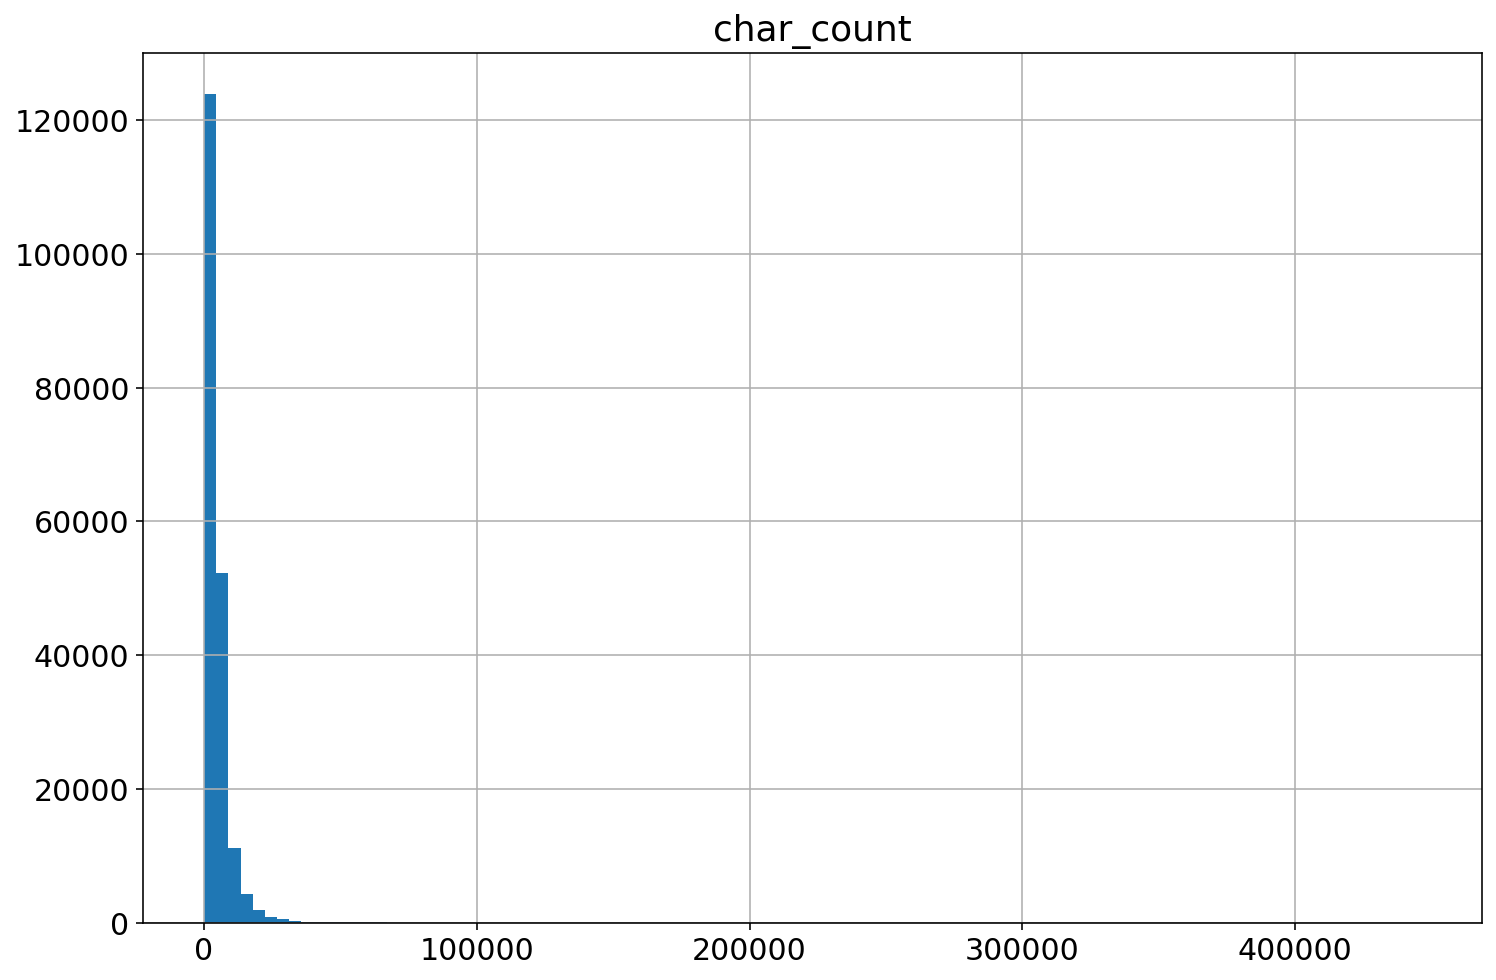

In [57]:
df.hist(column='char_count', bins=100, figsize=(12,8))

In [44]:
df.nlargest(5, ['char_count']) 

author                                               body  \
394340     Zdravi4u.cz  \n\n\n\n\n\n\n3  OHŘÍVAČE\n\nSRPEN – VLÁDNOU  ...   
326834              VT  Full Article Here.  (UPDATE — PATENT AFTER PRE...   
323994       Lee Kenny  For the first time, you can get to read the ex...   
285747  Erin Elizabeth  Bayer funded Adolph Hitler reign and was the b...   
258505           Admin  \nBetrayal of Public Trust & Institutional Cor...   

            id                                              image       label  \
394340  394340                                               None  unreliable   
326834  326834                                               None  unreliable   
323994  323994  https://www.naturalcures.com/wp-content/upload...  unreliable   
285747  285747  https://www.healthnutnews.com/wp-content/uploa...  unreliable   
258505  258505  https://healthimpactnews.com/wp-content/upload...  unreliable   

                                                    perex  \
394340  <p>3 OHŘÍVAČE SRPEN – VLÁDNOU NÁM 3 OHŘÍVAČE 3...   
326834  <p>VeriChip Corp shares tripled after the comp...   
323994  <p>Pounds and Inches Full transcript from HCG ...   
285747  <p>Bayer funded Adolph Hitler reign and was th...   
258505  <p>The focus of this article is how the Center...   

                      source  \
394340           zdravi4u.cz   
326834          vactruth.com   
323994      naturalcures.com   
285747     healthnutnews.com   
258505  healthimpactnews.com   

                                                    title language  \
394340                                       Mapa stránek       en   
326834  VeriChip shares jump after H1N1 patent license...       en   
323994           Dr Simeons Pounds &#038; Inches Protocol       en   
285747  IG Farben – Bayer funded Adolph Hitler reign a...       en   
258505  The Corruption of Science: Who Funds Vaccine S...       en   

        word_count  char_count  
394340       81928    446320.0  
326834       51157    349492.0  
323994       27145    171071.0  
285747       26921    167385.0  
258505       18919    129762.0

In [4]:
MIN_TEXT_LENGTH_FOR_DETECTION = 20

def average_wordcount(text):
    wordcounts = []
    if not text or len(text) < MIN_TEXT_LENGTH_FOR_DETECTION:
        return None
    sentences = text.split('.')
    for sentence in sentences:
        words = sentence.split(' ')
        wordcounts.append(len(words))
    return sum(wordcounts)/len(wordcounts)

In [5]:
for index, row in df.iterrows():
    df.at[index,'avg_sentence_length'] = average_wordcount(df.at[index, 'body'])

In [8]:
df[['body','avg_sentence_length']].round(2).head()

body  avg_sentence_length
235036  (NaturalNews) The United States government cla...                19.10
235037  DIGITAL KIDS: How to Click With Young Techies\...                17.74
235038  Herbs: Nature’s Fountain of Youth\n\nby Kathle...                21.14
235039  (NaturalNews) Beyond merely inspiring women to...                28.64
235040  Give Your Brain a Boost\n\nby Andrea Purcell\n...                16.34

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA9168DA58>]],
      dtype=object)

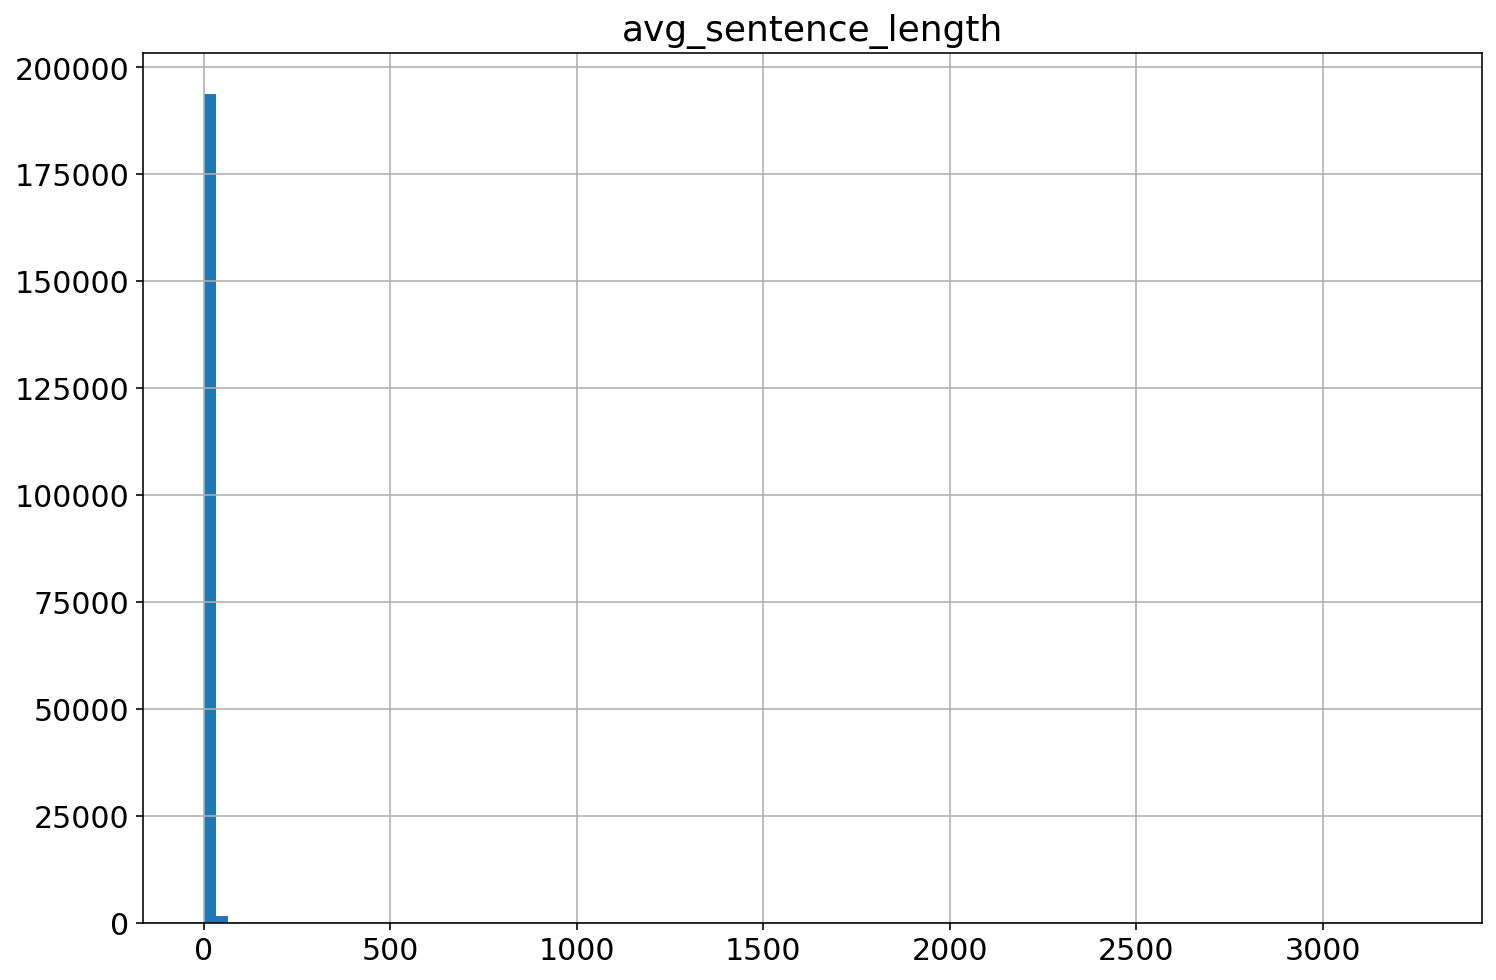

In [9]:
df.hist(column='avg_sentence_length', bins=100, figsize=(12,8))

In [13]:
df.nlargest(5, ['avg_sentence_length'])

author                                               body  \
392194   Zdravi4u.cz  \n\n\n adstringentní\n\n cedr, cypřiš, gerániu...   
392146   Zdravi4u.cz  Zde je  tedy seznam produktů a nemocí:  \nChor...   
392129   Zdravi4u.cz  Příčiny zvracení: \n\n                 Dietní ...   
394132   Zdravi4u.cz  \n\n\n\n Název rostliny\n\n\n Sbíraná část\n\n...   
331442  Thomas Perry  Return to What to Plant NOW to Maximize Your H...   

            id                                              image       label  \
392194  392194                                               None  unreliable   
392146  392146  https://zdravi4u.cz/wp-content/uploads/2005/08...  unreliable   
392129  392129                                               None  unreliable   
394132  394132  https://zdravi4u.cz/wp-content/uploads/2012/07...  unreliable   
331442  331442                                               None  unreliable   

                                                    perex           source  \
392194  <p>adstringentn&iacute; cedr, cypřiš, ger&aacu...      zdravi4u.cz   
392146  <p>Zde je&nbsp; tedy seznam produktů a nemoc&i...      zdravi4u.cz   
392129  <p>Př&iacute;činy zvracen&iacute;: Dietn&iacut...      zdravi4u.cz   
394132  <p>N&aacute;zev rostliny Sb&iacute;ran&aacute;...      zdravi4u.cz   
331442  <p>Return to What to Plant NOW to Maximize You...  realfarmacy.com   

                                                    title  avg_sentence_length  
392194  Vonné oleje, esenciální oleje &#8211; podle po...               3265.0  
392146                            Aloe vera. Co je na co?                998.0  
392129                                    Zvracení u dětí                426.0  
394132        KALENDÁŘ SBĚRU LÉČIVÝCH ROSTLIN L &#8211; R                355.0  
331442  (Sources and References) What to Plant NOW to ...                331.0